In [37]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import sys

sys.path.insert(0, "../")

from neural_lam.constants import PARAM_NAMES_SHORT, PARAM_UNITS, PARAM_NAMES

In [3]:
fp_root = Path("/nwp/neural-lam")
!tree {fp_root}

/nwp/neural-lam
├── data
│   └── meps_example
│       ├── samples
│       │   ├── test
│       │   │   ├── nwp_2022090100_mbr000.npy
│       │   │   ├── nwp_2022090100_mbr001.npy
│       │   │   ├── nwp_2022090112_mbr000.npy
│       │   │   ├── nwp_2022090112_mbr001.npy
│       │   │   ├── nwp_toa_downwelling_shortwave_flux_2022090100.npy
│       │   │   ├── nwp_toa_downwelling_shortwave_flux_2022090112.npy
│       │   │   ├── wtr_2022090100.npy
│       │   │   └── wtr_2022090112.npy
│       │   ├── train
│       │   │   ├── nwp_2022040100_mbr000.npy
│       │   │   ├── nwp_2022040100_mbr001.npy
│       │   │   ├── nwp_2022040112_mbr000.npy
│       │   │   ├── nwp_2022040112_mbr001.npy
│       │   │   ├── nwp_toa_downwelling_shortwave_flux_2022040100.npy
│       │   │   ├── nwp_toa_downwelling_shortwave_flux_2022040112.npy
│       │   │   ├── wtr_2022040100.npy
│       │   │   └── wtr_2022040112.npy
│       │   └── val
│       │       ├── nwp_2022060500_mbr000.npy
│       │       ├── n

In [5]:
fps_train = (fp_root / "data" / "meps_example" / "samples" / "train").glob("*")

fp_sample = next(iter(fps_train))
fp_sample

PosixPath('/nwp/neural-lam/data/meps_example/samples/train/nwp_2022040100_mbr000.npy')

In [7]:
arr = np.load(fp_sample)
arr.shape

(65, 268, 238, 18)

In [20]:
da = xr.DataArray(arr, dims=["time", "y", "x", "feature"])
da

<xarray.DataArray (time: 65, y: 268, x: 238, feature: 18)>
array([[[[ 1.01089750e+05,  1.01081555e+05, -4.46286969e+05, ...,
          -3.87091064e+00,  8.64778625e+02,  5.18363711e+04],
         [ 1.01041250e+05,  1.01023680e+05, -4.44942969e+05, ...,
          -6.87091064e+00,  8.26591125e+02,  5.17682461e+04],
         [ 1.00984250e+05,  1.00989617e+05, -4.43518969e+05, ...,
           2.12908936e+00,  7.90091125e+02,  5.17377461e+04],
         ...,
         [ 9.89752500e+04,  1.00117805e+05, -1.14846969e+05, ...,
           9.24629089e+02,  8.25286255e+01,  5.38962461e+04],
         [ 9.90887500e+04,  1.00147367e+05, -8.89429688e+04, ...,
           8.50129089e+02,  1.00278625e+02,  5.39228711e+04],
         [ 9.90992500e+04,  1.00177242e+05, -7.41429688e+04, ...,
           8.73129089e+02,  1.41216125e+02,  5.39359961e+04]],

        [[ 1.01098750e+05,  1.01093492e+05, -4.47518969e+05, ...,
           1.12908936e+00,  8.64278625e+02,  5.18279961e+04],
         [ 1.01038250e+05,  1.01042742e+05, -4.40446969e+05, ...,
           3.62908936e+00,  8.23903625e+02,  5.17589961e+04],
         [ 1.00988250e+05,  1.00995117e+05, -3.20366969e+05, ...,
           5.12908936e+00,  7.87778625e+02,  5.17287461e+04],
...
           1.54512915e+03,  9.61781128e+02,  5.05284766e+04],
         [ 1.00218516e+05,  1.01302164e+05, -1.11912000e+05, ...,
           8.00629089e+02,  9.66218628e+02,  5.05313516e+04],
         [ 1.00036516e+05,  1.01307789e+05, -8.58000000e+04, ...,
           9.41629089e+02,  9.71281128e+02,  5.05394766e+04]],

        [[ 1.02258516e+05,  1.02246727e+05, -3.00328000e+05, ...,
          -1.37091064e+00,  1.64146863e+03,  5.14052266e+04],
         [ 1.02241016e+05,  1.02240102e+05, -3.02888000e+05, ...,
           1.12908936e+00,  1.63471863e+03,  5.13862266e+04],
         [ 1.02230016e+05,  1.02231852e+05, -3.04936000e+05, ...,
           3.12908936e+00,  1.63109363e+03,  5.13687266e+04],
         ...,
         [ 9.74590156e+04,  1.01314727e+05, -1.16008000e+05, ...,
           2.88862915e+03,  9.73468628e+02,  5.05439766e+04],
         [ 9.87430156e+04,  1.01341164e+05, -9.96240000e+04, ...,
           1.94162915e+03,  9.79718628e+02,  5.05476016e+04],
         [ 9.89600156e+04,  1.01305039e+05, -1.09352000e+05, ...,
           1.78112915e+03,  9.97781128e+02,  5.05726016e+04]]]],
      dtype=float32)
Dimensions without coordinates: time, y, x, feature

In [39]:
var_names = list(PARAM_NAMES_SHORT)
var_names.insert(15, "z_alt")
long_names = list(PARAM_NAMES)
long_names.insert(15, "z_height_above_ground")
units = list(PARAM_UNITS)
units.insert(15, "m")
da.coords["feature"] = var_names

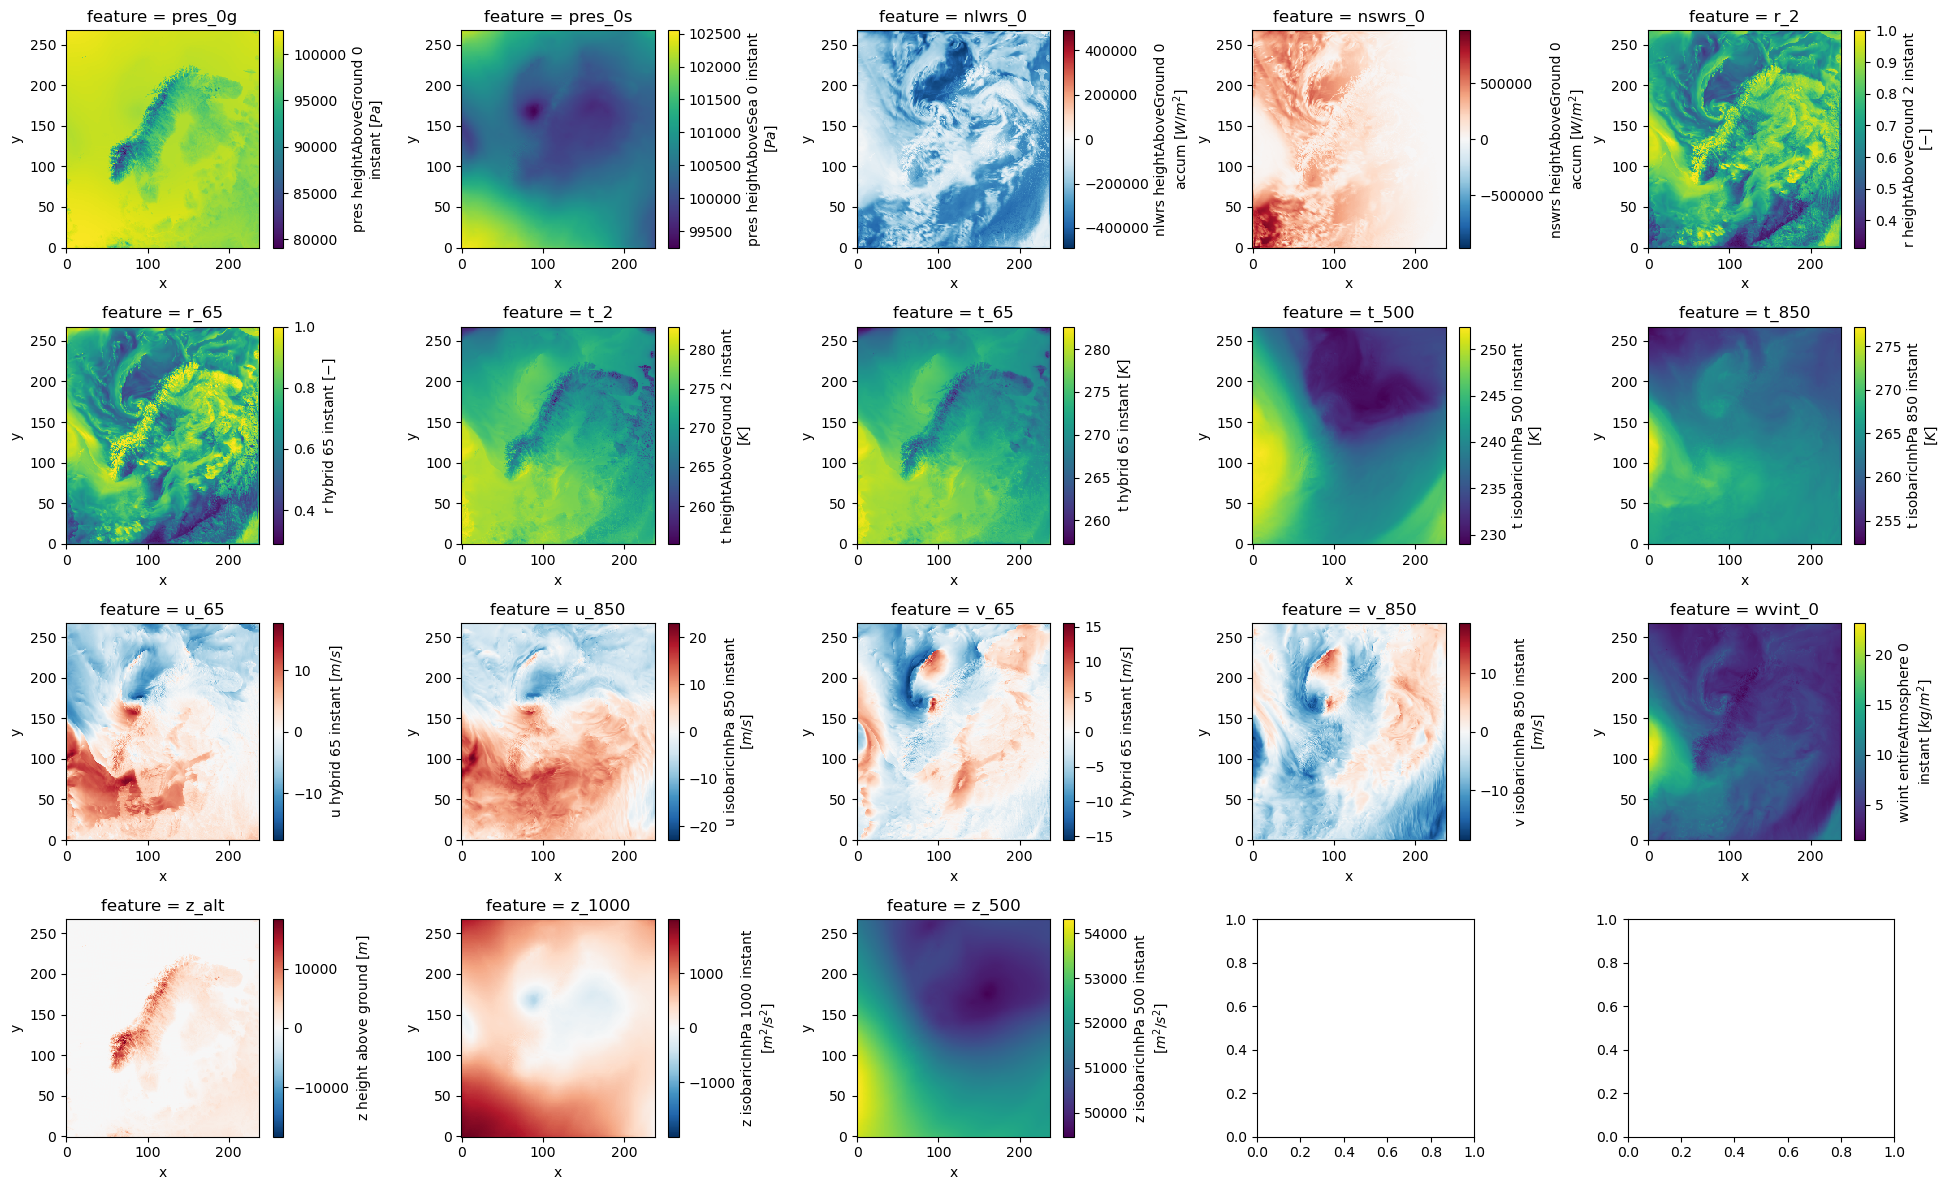

In [53]:
ncols = 5
nvars = len(da.feature)
nrows = nvars // ncols
if ncols*nrows < nvars:
    nrows += 1

size = 3.0
aspect = 1.3

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*size*aspect, nrows*size))

for i, ax in enumerate(axes.flatten()):
    ax.set_aspect(1.0)
    if i == nvars:
        break
    da_ = da.isel(time=-1, feature=i)
    v_units = units[i].replace('\\textsuperscript', '^')
    da_.attrs["units"] = f"${v_units}$"
    da_.attrs["long_name"] = long_names[i].replace("_", " ")
    da_.plot(ax=ax)
    # ax.set_title(i)
fig.tight_layout()